In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Customer_Churn_Prediction')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Customer_Churn_Prediction/Telco-Customer-Churn-Cleaned.csv")

In [ ]:
print(df.shape)
print(df.dtypes)
print(df.isna().sum())

(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod

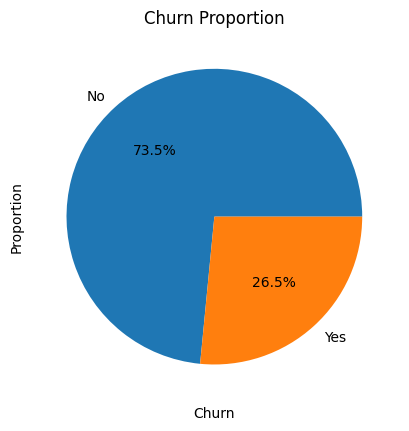

In [ ]:
plt.figure()
df["Churn"].value_counts(normalize=True).plot(kind="pie",autopct='%1.1f%%')
plt.title("Churn Proportion")
plt.ylabel("Proportion")
plt.xlabel("Churn")
plt.show()

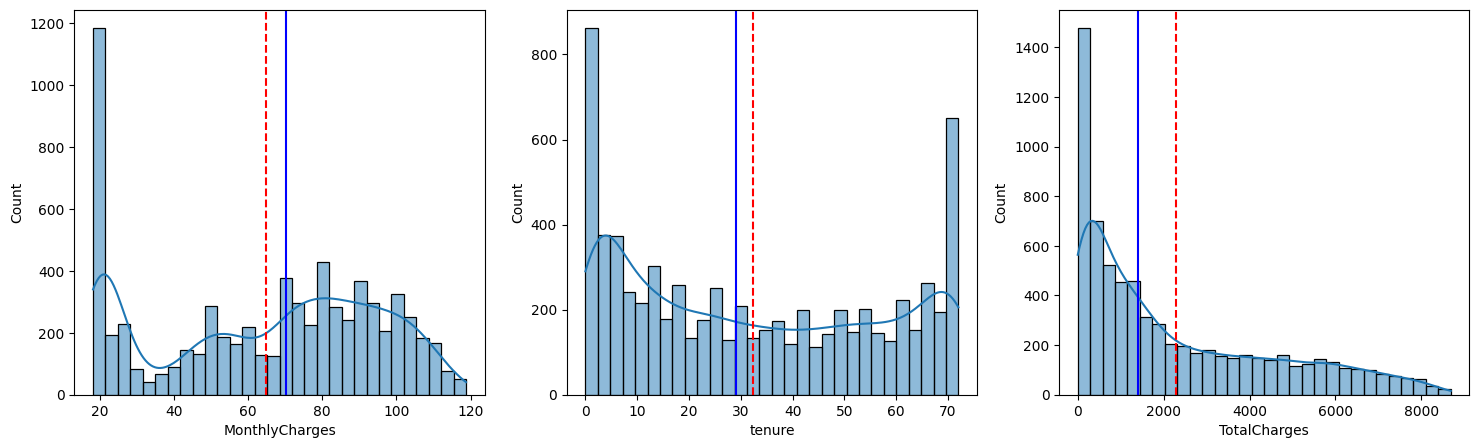

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["MonthlyCharges"], bins=30, kde=True,ax=axes[0])
mc_mean = df["MonthlyCharges"].mean()
mc_median = df["MonthlyCharges"].median()
axes[0].axvline(mc_mean, color='red', linestyle='--', label='Mean')
axes[0].axvline(mc_median, color='blue', linestyle='-', label='Median')

sns.histplot(df["tenure"], bins=30, kde=True,ax=axes[1])
t_mean = df["tenure"].mean()
t_median = df["tenure"].median()
axes[1].axvline(t_mean, color='red', linestyle='--', label='Mean')
axes[1].axvline(t_median, color='blue', linestyle='-', label='Median')

sns.histplot(df["TotalCharges"], bins=30, kde=True,ax=axes[2])
tc_mean = df["TotalCharges"].mean()
tc_median = df["TotalCharges"].median()
axes[2].axvline(tc_mean, color='red', linestyle='--', label='Mean')
axes[2].axvline(tc_median, color='blue', linestyle='-', label='Median')

fig.show()

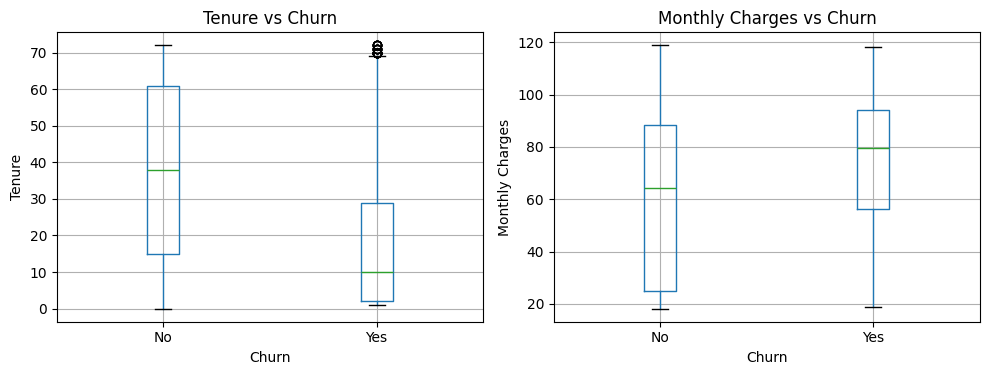

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df.boxplot(column="tenure", by="Churn", ax=axes[0])
axes[0].set_title("Tenure vs Churn")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Tenure")

df.boxplot(column="MonthlyCharges", by="Churn", ax=axes[1])
axes[1].set_title("Monthly Charges vs Churn")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Monthly Charges")

plt.suptitle("")
plt.tight_layout()
plt.show()

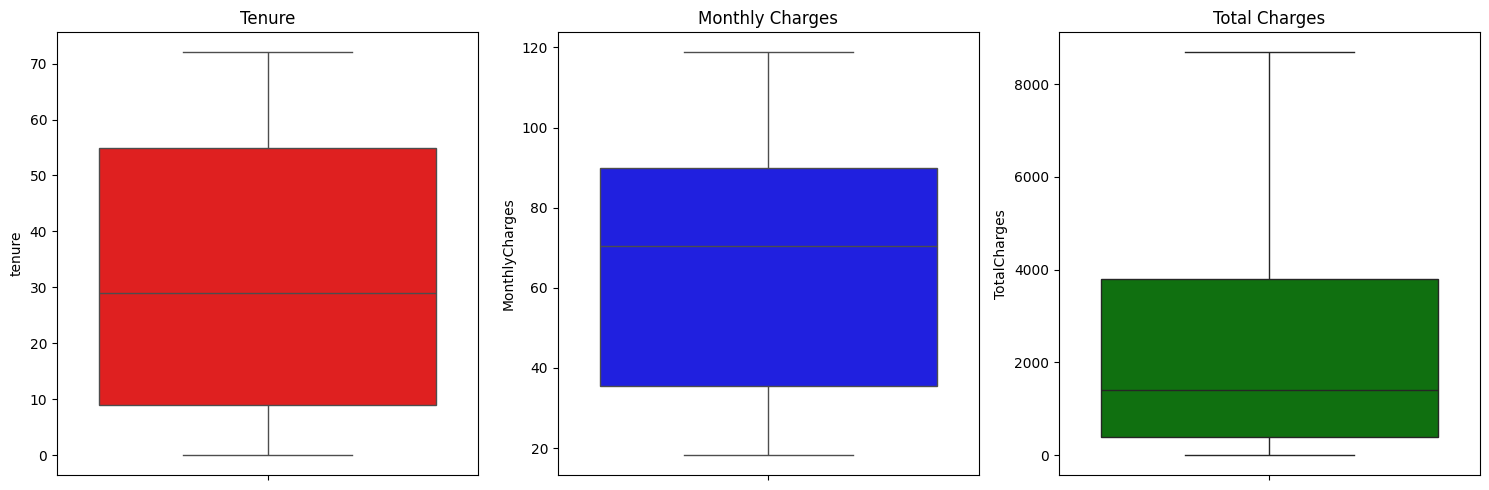

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df['tenure'], ax=axes[0], color='red').set_title('Tenure')
sns.boxplot(y=df['MonthlyCharges'], ax=axes[1], color='blue').set_title('Monthly Charges')
sns.boxplot(y= df['TotalCharges'], ax=axes[2], color='green').set_title('Total Charges')

plt.tight_layout()
plt.show()

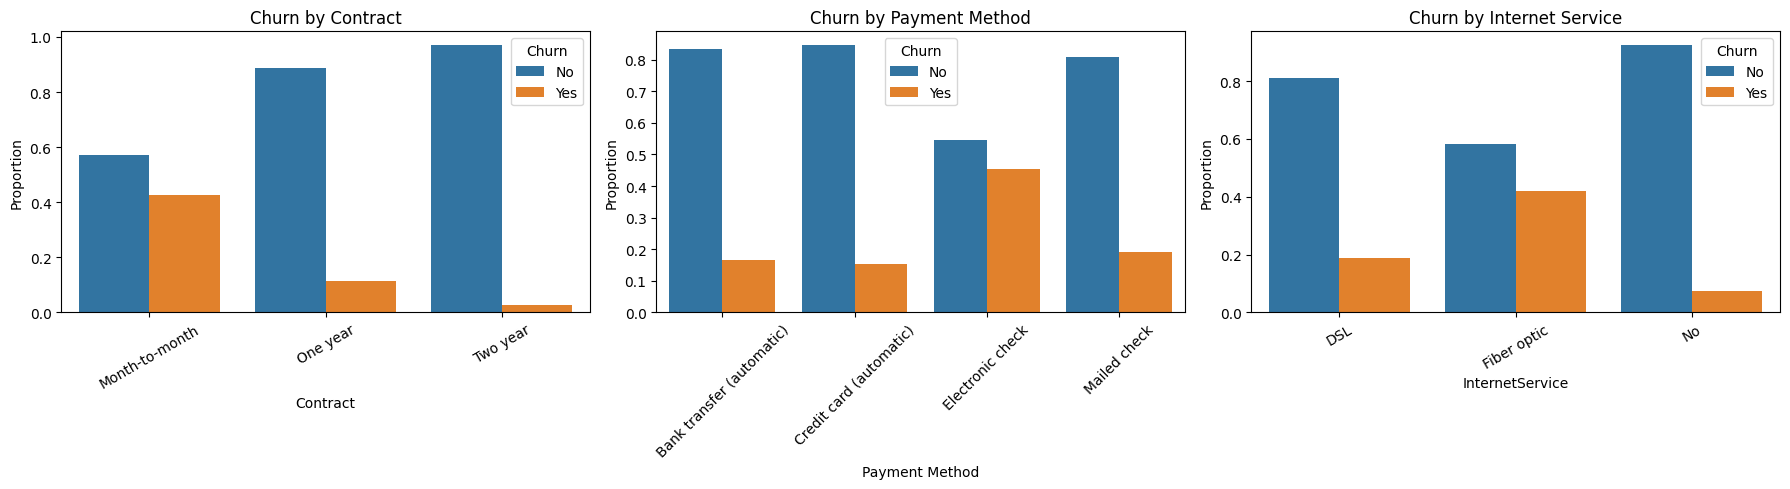

In [ ]:
contract_prop = (
    pd.crosstab(df["Contract"], df["Churn"], normalize="index")
    .reset_index()
    .melt(id_vars="Contract", value_name="Proportion")
)
payment_method_prop = (
    pd.crosstab(df["PaymentMethod"], df["Churn"], normalize="index")
    .reset_index()
    .melt(id_vars="PaymentMethod", value_name="Proportion")
)
internet_service_prop = (
    pd.crosstab(df["InternetService"], df["Churn"], normalize="index")
    .reset_index()
    .melt(id_vars="InternetService", value_name="Proportion")
)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(
    data=contract_prop,
    x="Contract",
    y="Proportion",
    hue="Churn",
    ax=axes[0]
)
axes[0].set_title("Churn by Contract")
axes[0].tick_params(axis="x", rotation=30)

sns.barplot(
    data=payment_method_prop,
    x="PaymentMethod",
    y="Proportion",
    hue="Churn",
    ax=axes[1]
)
axes[1].set_title("Churn by Payment Method")
axes[1].tick_params(axis="x", rotation=45)
axes[1].set_xlabel("Payment Method")

sns.barplot(
    data=internet_service_prop,
    x="InternetService",
    y="Proportion",
    hue="Churn",
    ax=axes[2]
)
axes[2].set_title("Churn by Internet Service")
axes[2].tick_params(axis="x", rotation=30)

plt.tight_layout()
plt.show()


In [ ]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']
corr = df[num_cols].corr()
print("Numeric Correlation Matrix:")
print(corr)

Numeric Correlation Matrix:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.826178
MonthlyCharges  0.247900        1.000000      0.651174
TotalCharges    0.826178        0.651174      1.000000
